## Predict exacerbation using classification algorithm

In [100]:
import pandas as pd
import numpy as np

In [101]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 110)

In [102]:
df = pd.read_csv('added_food_allergens_f.csv')

In [103]:
df.head()

,ethnicity,asthma_family_history,mother_has_asthma,father_has_asthma,family_history_eczema,mother_has_eczema,father_has_eczema,family_history_hayfever,mother_has_hayfever,father_has_hayfever,family_history_food_allergy,mother_has_food_allergy,father_has_food_allergy,mother_smoked_during_pregnancy,pets,child_eczema_before_enrolment,birth_weight_kg,Child_sex,skin_prick_wheat,skin_prick_sesame,skin_prick_peanut,skin_prick_milk,skin_prick_fish,skin_prick_egg,skin_prick_soya,skin_prick_cat,skin_prick_dog,skin_prick_dust_mite,skin_prick_grass_pollen,skin_prick_hazelnut,skin_prick_cashew,skin_prick_almond,skin_prick_walnut,milk,wheat,freq of egg baby food consumed at 36 months_new,freq of egg consumed at 36 months_new,egg,bread,pasta,pastry,tortilla,croissant,scone,cake,pancake,jaffa,mayo,yoghurt,custard,cream,freq of soft cheese consumed at 36 months_new,freq of cheese sauce consumed at 36 months_new,freq of hard cheese consumed at 36 months_new,cheese,freq of fish fingers consumed at 36 months_new,freq of fish cakes consumed at 36 months_new,freq of fish pie consumed at 36 months_new,freq of fish baby food consumed at 36 months_new,fish,freq of peanut butter consumed at 36 months_new,freq of peanut cereal consumed at 36 months_new,freq of peanut choc consumed at 36 months_new,peanut,freq of sesame crackers consumed at 36 months_new,freq of sesame snaps consumed at 36 months_new,freq of sesame bread consumed at 36 months_new,sesame,exacerbated_or_not
0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,144,144,1080,144,36,72,144,0,72,422,0,0,2160,0,0,422,144,422,988,36,0,72,0,108,0,0,0,0,0,0,0,0,0.0
1,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.62,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,422,422,720,144,144,72,36,36,72,72,0,720,1080,0,36,144,36,720,900,422,0,144,0,566,422,144,0,566,72,72,144,288,0.0
2,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.94,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,144,0,72,72,1080,0,0,144,422,0,422,0,0,0,720,0,36,144,144,422,710,422,0,144,0,566,720,0,0,720,422,0,2160,2582,0.0
3,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.93,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,422,422,1080,36,36,0,72,0,72,1080,0,720,720,720,720,720,0,0,720,72,0,422,0,494,0,0,36,36,0,0,0,0,NaN
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.25,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,422,422,1080,0,72,36,72,0,144,144,36,36,720,720,36,36,0,720,756,422,0,144,0,566,720,0,0,720,422,0,36,458,0.0


In [104]:
#get rid of repetitive columns
cols=['freq of egg baby food consumed at 36 months_new','freq of egg consumed at 36 months_new',
      'freq of soft cheese consumed at 36 months_new','freq of cheese sauce consumed at 36 months_new',
      'freq of hard cheese consumed at 36 months_new','freq of fish fingers consumed at 36 months_new',
      'freq of fish cakes consumed at 36 months_new','freq of fish pie consumed at 36 months_new',
     'freq of fish baby food consumed at 36 months_new','freq of peanut butter consumed at 36 months_new',
      'freq of peanut cereal consumed at 36 months_new','freq of peanut choc consumed at 36 months_new',
     'freq of sesame crackers consumed at 36 months_new','freq of sesame snaps consumed at 36 months_new',
     'freq of sesame bread consumed at 36 months_new']
df = df.drop(cols,axis=1)

In [105]:
#check class balance
df.exacerbated_or_not = np.where(df.exacerbated_or_not.isna(), 1,df.exacerbated_or_not)
df.exacerbated_or_not.value_counts()

0.0    1195
1.0     108
Name: exacerbated_or_not, dtype: int64

In [106]:
#check NAs in the data
df.isna().sum()

ethnicity                           0
asthma_family_history               2
mother_has_asthma                   2
father_has_asthma                   2
family_history_eczema               2
mother_has_eczema                   2
father_has_eczema                   2
family_history_hayfever             2
mother_has_hayfever                 2
father_has_hayfever                 2
family_history_food_allergy         2
mother_has_food_allergy             2
father_has_food_allergy             2
mother_smoked_during_pregnancy      2
pets                                2
child_eczema_before_enrolment      78
birth_weight_kg                     1
Child_sex                           0
skin_prick_wheat                  119
skin_prick_sesame                 121
skin_prick_peanut                 119
skin_prick_milk                   120
skin_prick_fish                   121
skin_prick_egg                    120
skin_prick_soya                   123
skin_prick_cat                    163
skin_prick_d

In [107]:
#replace the NA in continuous variables with KNN imputer
knn_df = df[['skin_prick_wheat','skin_prick_sesame','skin_prick_peanut','skin_prick_milk','skin_prick_fish',
             'skin_prick_egg','skin_prick_soya','skin_prick_cat','skin_prick_dog','skin_prick_dust_mite',
             'skin_prick_grass_pollen','skin_prick_hazelnut','skin_prick_cashew','skin_prick_almond','skin_prick_walnut',
            'birth_weight_kg']]
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df),columns = knn_df.columns)

In [108]:
#replace those columns in the main dataframe
df = df.drop(['skin_prick_wheat','skin_prick_sesame','skin_prick_peanut','skin_prick_milk','skin_prick_fish',
             'skin_prick_egg','skin_prick_soya','skin_prick_cat','skin_prick_dog','skin_prick_dust_mite',
             'skin_prick_grass_pollen','skin_prick_hazelnut','skin_prick_cashew','skin_prick_almond','skin_prick_walnut',
             'birth_weight_kg'],axis=1)
df = df.fillna(0)
df = pd.concat([df, knn_df], axis=1)
df

,ethnicity,asthma_family_history,mother_has_asthma,father_has_asthma,family_history_eczema,mother_has_eczema,father_has_eczema,family_history_hayfever,mother_has_hayfever,father_has_hayfever,family_history_food_allergy,mother_has_food_allergy,father_has_food_allergy,mother_smoked_during_pregnancy,pets,child_eczema_before_enrolment,Child_sex,milk,wheat,egg,bread,pasta,pastry,tortilla,croissant,scone,cake,pancake,jaffa,mayo,yoghurt,custard,cream,cheese,fish,peanut,sesame,exacerbated_or_not,skin_prick_wheat,skin_prick_sesame,skin_prick_peanut,skin_prick_milk,skin_prick_fish,skin_prick_egg,skin_prick_soya,skin_prick_cat,skin_prick_dog,skin_prick_dust_mite,skin_prick_grass_pollen,skin_prick_hazelnut,skin_prick_cashew,skin_prick_almond,skin_prick_walnut,birth_weight_kg
0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,144,1080,144,36,72,144,0,72,422,0,0,2160,0,0,988,108,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70
1,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,422,720,144,144,72,36,36,72,72,0,720,1080,0,36,900,566,566,288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.62
2,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,144,72,1080,0,0,144,422,0,422,0,0,0,720,0,36,710,566,720,2582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.94
3,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,422,1080,36,36,0,72,0,72,1080,0,720,720,720,720,720,494,36,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.93
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,422,1080,0,72,36,72,0,144,144,36,36,720,720,36,756,566,720,458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,422,720,144,36,72,72,36,422,720,36,0,422,0,0,1214,566,0,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00
1299,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,144,720,0,0,144,0,0,72,72,0,0,144,0,72,288,252,422,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.69
1300,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,422,1080,144,144,144,72,72,144,144,0,422,1080,144,0,1214,288,638,360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.07
1301,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,144,0,720,0,0,422,0,0,0,0,0,0,0,0,0,0,844,720,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.30


##### Correlation Matrix

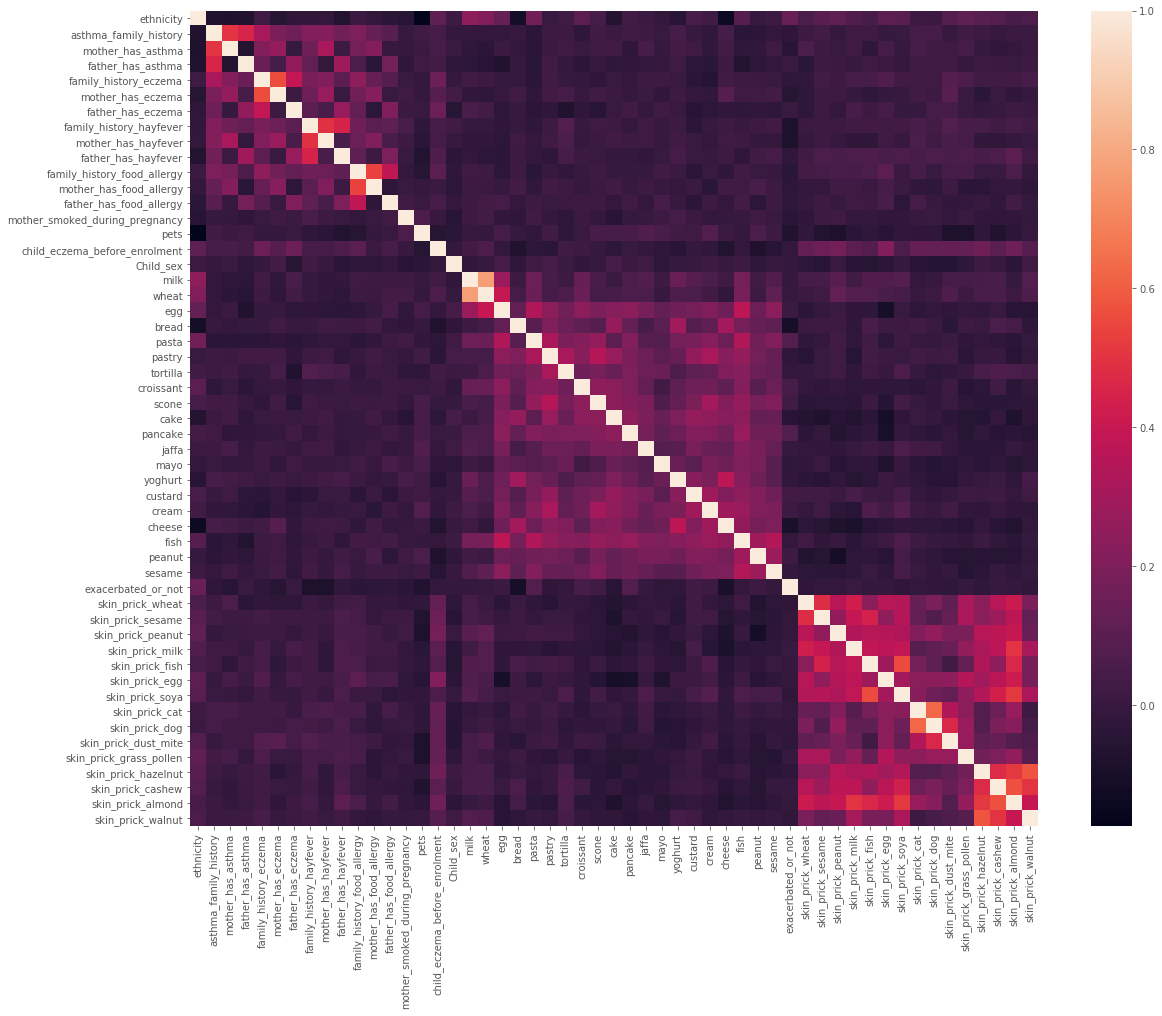

In [47]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

correlation_mat = df.corr()

plt.figure(figsize=(19, 15))

sns.heatmap(correlation_mat)

plt.show()

In [49]:
#df.to_csv('~/Capstone/final_df.csv',index=False)

In [50]:
#Over sampling done to balance the classes
from imblearn.over_sampling import RandomOverSampler
X = df.drop(['exacerbated_or_not'], axis = 1)
y = df.exacerbated_or_not
rus = RandomOverSampler(sampling_strategy=0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(2151, 52) (2151,)
0.0    1195
1.0     956
Name: exacerbated_or_not, dtype: int64


In [51]:
#scale the data before feeding it to logistic algorithm
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_res)
X_scaled = scaler.transform(X_res)
X_scaled


array([[-0.4382842 ,  0.85468751,  1.80304968, ..., -0.16003587,
        -0.14146447, -0.07317226],
       [-0.4382842 ,  0.85468751,  1.80304968, ..., -0.16003587,
        -0.14146447, -0.07317226],
       [-0.4382842 ,  0.85468751, -0.55461589, ..., -0.16003587,
        -0.14146447, -0.07317226],
       ...,
       [-0.4382842 , -1.17001826, -0.55461589, ..., -0.16003587,
        -0.14146447, -0.07317226],
       [-0.4382842 ,  0.85468751, -0.55461589, ..., -0.16003587,
        -0.14146447, -0.07317226],
       [ 2.78662792, -1.17001826, -0.55461589, ..., -0.16003587,
        -0.14146447, -0.07317226]])

#### Logistic Regression

In [52]:
#RFE to reduce dimentionality
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_scaled, y_res)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False False False  True  True False  True False
 False  True  True False  True  True False False  True  True  True False
  True False  True  True False False  True False False  True False  True
 False False  True False False  True False  True  True  True False False
  True False  True  True]
[ 1 27 15  1 19 18 12  1  1 20  1 23  8  1  1  5  1  1  3 26  1  1  1  9
  1 14  1  1 17  7  1 21 25  1 10  1 11  4  1 24 13  1 22  1  1  1  2 16
  1  6  1  1]


In [53]:
rfe_col = pd.DataFrame({'column_name':(df.drop('exacerbated_or_not',axis=1)).columns,
             'boolean':rfe.support_,
             'ranking':rfe.ranking_})

In [54]:
X_log=X_res[rfe_col[rfe_col['boolean'] == True]['column_name'].values]

In [55]:
scaler = preprocessing.StandardScaler().fit(X_log)
X_scaled_log = scaler.transform(X_log)

In [60]:
#train model using the reduced parameters dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_scaled_log, y_res, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [81]:
y_test.value_counts()

0.0    362
1.0    284
Name: exacerbated_or_not, dtype: int64

##### Confusion Matrix

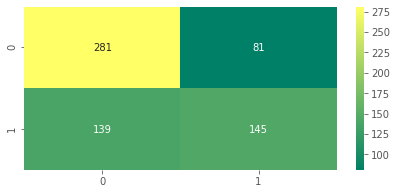

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,3))
sns.heatmap(confusion_matrix, annot=True,cmap="summer",fmt='g')

##### Classification Report

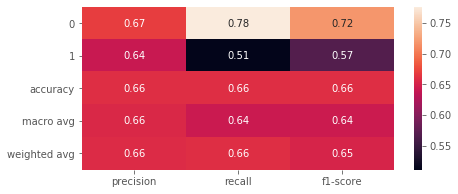

In [91]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred, target_names=['0','1'],output_dict=True)
plt.figure(figsize = (7,3))


sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

##### ROC Curve

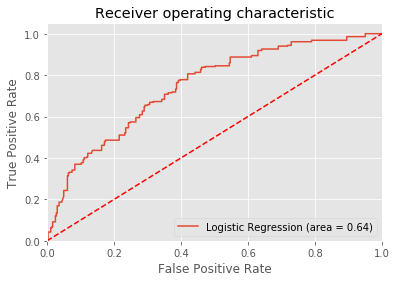

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC curve shows low area under the curve. This is a weak model

##### Feature Importance Chart

In [65]:
feature_imp_df = pd.DataFrame({'column_name':X_log.columns,'importance':logreg.coef_[0]})
feature_imp_df = feature_imp_df.sort_values(by='importance',ascending = False)
feature_imp_df = feature_imp_df.reset_index(drop=True)
feature_imp_df.head()

,column_name,importance
0,ethnicity,0.399257
1,pancake,0.260595
2,peanut,0.257599
3,skin_prick_fish,0.230155
4,skin_prick_almond,0.205609


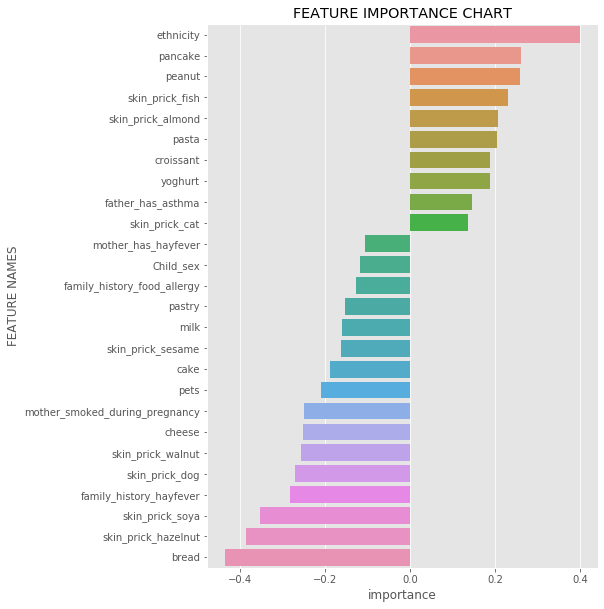

In [66]:
import seaborn as sns

plt.figure(figsize=(7,10))
sns.barplot(x=feature_imp_df['importance'], y=feature_imp_df['column_name'])
plt.title('FEATURE IMPORTANCE CHART')
plt.ylabel('FEATURE NAMES')
plt.show()

#### Random Forest

In [33]:
#considering all features for RF
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf_predictions = rf.predict(X_test)

print('Accuracy of RF classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.99


##### Confusion Matrix

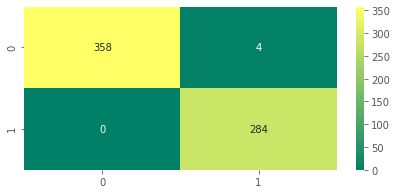

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize = (7,3))
sns.heatmap(confusion_matrix, annot=True,cmap="summer",fmt='g')

##### Classification Report

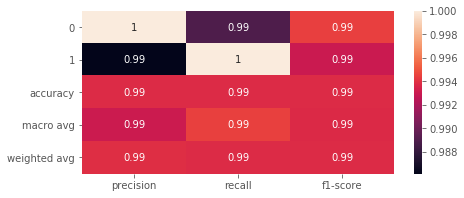

In [94]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, rf_predictions,target_names=['0','1'],output_dict=True)

plt.figure(figsize = (7,3))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

##### Feature Importance

In [38]:
feature_imp_df = pd.DataFrame({'column_name':X_res.columns,'importance':rf.feature_importances_})
feature_imp_df = feature_imp_df.sort_values(by='importance',ascending = False)
feature_imp_df = feature_imp_df.reset_index(drop=True)
feature_imp_df.head()

,column_name,importance
0,cheese,0.058573
1,peanut,0.056553
2,fish,0.055130
3,sesame,0.042351
4,egg,0.040857


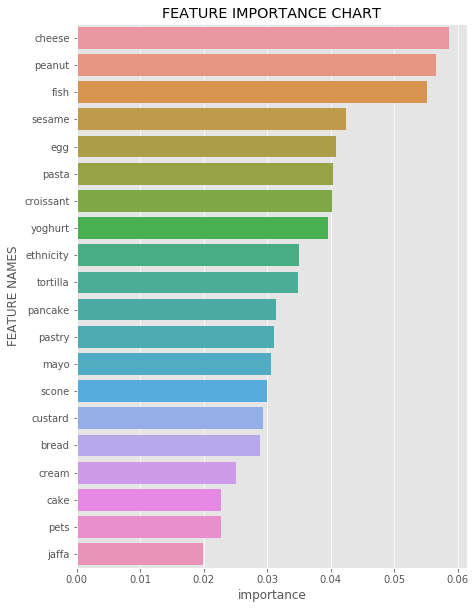

In [39]:
plt.figure(figsize=(7,10))
sns.barplot(x=feature_imp_df['importance'].head(20), y=feature_imp_df['column_name'].head(20))
plt.title('FEATURE IMPORTANCE CHART')
plt.ylabel('FEATURE NAMES')
plt.show()